In [1]:
##Goal is to predict the price of Amazon Best Sellers using other columns in the dataset
#Start whenever, get a chance: Sometime early Decemember

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("c://Users//Matt//Desktop//dataprojects//machine_learning_7//bestsellers.csv")

In [4]:
##Dataset is Amazon bestselling books from 2014 - 2019

books = pd.DataFrame(data)
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [26]:
## Seeing who the most common authors are in the dataset

books.Author.value_counts().head()

Jeff Kinney                           12
Rick Riordan                          11
Suzanne Collins                       11
Gary Chapman                          11
American Psychological Association    10
Name: Author, dtype: int64

In [6]:
##Top 25 authors, based on highest average user rating

i = books.groupby(['Author'])['User Rating'].mean()
i.sort_values(ascending = False).head(25)

Author
Jill Twiss               4.900000
Bill Martin Jr.          4.900000
Nathan W. Pyle           4.900000
Patrick Thorpe           4.900000
Lin-Manuel Miranda       4.900000
Sherri Duskey Rinker     4.900000
Chip Gaines              4.900000
Alice Schertle           4.900000
Pete Souza               4.900000
Rush Limbaugh            4.900000
Emily Winfield Martin    4.900000
Sarah Young              4.900000
Eric Carle               4.900000
Dav Pilkey               4.900000
Dr. Seuss                4.877778
Mark R. Levin            4.850000
J. K. Rowling            4.850000
Brandon Stanton          4.833333
Marjorie Sarnat          4.800000
Paul Kalanithi           4.800000
Brené Brown             4.800000
Ree Drummond             4.800000
Wizards RPG Team         4.800000
Raina Telgemeier         4.800000
Julia Child              4.800000
Name: User Rating, dtype: float64

In [7]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## Findings from Describe:

### User Reviews: 
Average review is a 4.6, worst review is a 3.3 and the best is a 4.9 
 
### Reviews:
The average number of reviews written about a book is 11,953. The most reviews written on a book is 87,841.
 
### Price:
The average price of a book in the dataset is 13 dollars, a standard deviation of 10.82 dollars. The most expensive book in the data set is 105 dollars.


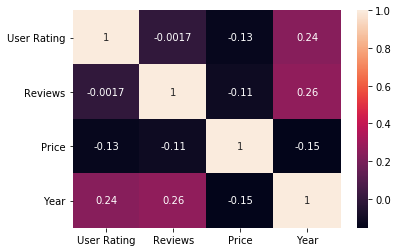

In [8]:
import seaborn as sns
sns.heatmap(books.corr(),annot=True)

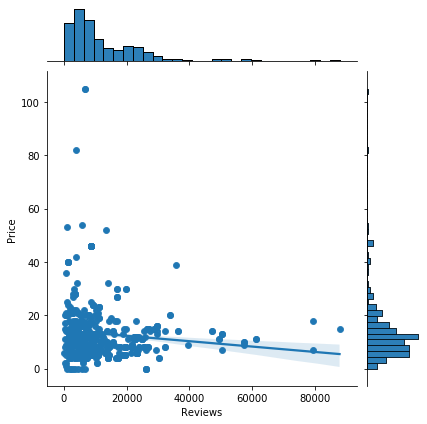

In [9]:
## PLotting reviews compared to the price of the books with a regression line

g = sns.jointplot(data = books, x = 'Reviews', y = 'Price')
g = g.plot(sns.regplot, sns.histplot)

In [10]:
##Building a linear regression model with reviews as the dependent variable and price has the predictor variable

import statsmodels.formula.api as smf
model1 = smf.ols(" Q('Reviews') ~ Q('Price') ", data=books).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('Reviews')   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.611
Date:                Fri, 27 Nov 2020   Prob (F-statistic):             0.0104
Time:                        23:17:35   Log-Likelihood:                -5930.1
No. Observations:                 550   AIC:                         1.186e+04
Df Residuals:                     548   BIC:                         1.187e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.35e+04    780.976     17.287      0.000     1.2e+04     1.5e+04
Q('Price')  -118.1328     45.944     -2.571      0.010    -208.380     -27.886
==============================================================================
Omnibus:                      311.289   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2373.567
Skew:                           2.432   Prob(JB):                         0.00
Kurtosis:                      11.939   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

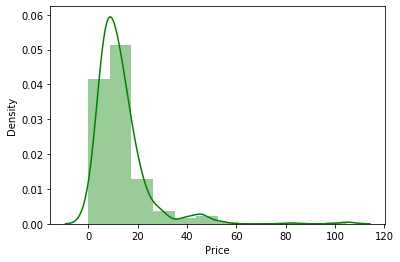

In [11]:
sns.distplot(books['Price'], color='g', bins = 12)

## Beginning to create machine learning model to predict price of book

In [12]:
##Make Fiction and non-fiction binary
#Code for idea: https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# books['genre_group'] = 0 
# books.loc[books['Genre'] == 'Fiction','genre_group'] = 1

##Another way to do same thing, more effective
#Code above in cell, was my thought process. Found a better way to do it from link in cell
books['Genre'].replace(['Non Fiction','Fiction'],[0,1],inplace=True)

books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,0


In [13]:
##Importing everything that might be needed

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [14]:
train_set, test_set = train_test_split(books, test_size = .2, random_state = 15)

y = pd.DataFrame(train_set['Price'])
y2 = pd.DataFrame(test_set['Price'])
X = pd.DataFrame(train_set[['User Rating', 'Reviews', 'Year','Genre']])
X2 = pd.DataFrame(test_set[['User Rating', 'Reviews', 'Year','Genre']])

In [15]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X,y)
prediction = model.predict(X2)
prediction

array([ 8,  8,  8,  6,  8,  8, 17,  6, 17,  6,  8,  6,  8,  6,  8,  8,  8,
        8,  6,  8,  6,  8,  8,  8, 17,  8,  6,  8, 17,  6,  8, 17,  8,  6,
        8,  6,  8,  8,  6, 17,  8,  6,  8, 17, 17,  8,  6, 17,  8, 17,  8,
        6,  8,  6,  8, 17,  6,  8,  6, 17,  8,  8,  6, 17,  8,  6,  6,  8,
        8,  6,  6,  8,  6,  8,  8,  8,  6,  8,  8,  6, 17,  6,  8,  8, 17,
        6,  8,  8,  8, 40, 17,  8,  8,  6,  8,  8,  8,  8,  8, 17,  8,  8,
        8,  8,  6,  6,  6, 17,  6,  6], dtype=int64)

In [16]:
accuracy = model.score(X2, y2)
print("Accuracy of logistic regression: %.2f%%" % (accuracy * 100.0))

Accuracy of logistic regression: 11.82%


In [17]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(X, y)
prediction2 = model2.predict(X2)

accuracy2 = model2.score(X2, y2)
print("Accuracy of naive bayes: %.2f%%" % (accuracy2 * 100.0))

Accuracy of naive bayes: 18.18%


In [18]:
from sklearn import svm
model3 = svm.SVC(gamma="scale",kernel="rbf")
model3.fit(X, y)

prediction3 = model3.predict(X2)
accuracy3 = model3.score(X2, y2)
print("Accuracy of support vector machines: %.2f%%" % (accuracy3 * 100.0))

Accuracy of support vector machines: 12.73%


In [19]:
##Calculating mean squared error
#How far each estimated value is off from actual value
#My model is about 8.90 dollars off on each value 

from sklearn.metrics import mean_squared_error
from math import sqrt

lin_mse = mean_squared_error(y2, prediction)
lin_rmse = np.sqrt(lin_mse)
rounded = lin_rmse.round(3)
print("Squared mean error: " + str(rounded))

Squared mean error: 10.5


In [20]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

## Constructing a voting classifier to try and improve score
#Code from: https://www.kaggle.com/fengdanye/machine-learning-6-basic-ensemble-learning

rfClf = RandomForestClassifier(n_estimators=500, random_state=10)  
svmClf = SVC(probability=True, random_state=10) 
logClf = LogisticRegression(random_state=10)

voting = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

voting.fit(X, y) 

prediction4 = voting.predict(X2)
accuracy4 = voting.score(X2, y2)
print("Accuracy of Voting Classifier: %.2f%%" % (accuracy4 * 100.0))

Accuracy of Voting Classifier: 40.91%


In [21]:
prediction4

array([20,  4,  8, 16, 15,  8, 15, 10, 15, 16,  5,  9, 10, 18,  4,  4,  4,
        8,  6, 20,  0, 12,  8,  4, 17, 15, 13, 13, 14, 14,  8, 11, 16,  4,
        8,  4, 46, 14,  9,  9,  8,  5,  8,  7, 40,  9,  5,  4, 19, 11, 13,
       17, 13, 13,  9,  0, 12,  6, 17, 12, 20, 20,  4, 14,  6,  9,  4,  8,
       13, 15,  8, 23,  8,  8,  4, 11, 12,  8,  8, 10,  0,  4,  2, 13,  4,
        8,  8,  7, 10, 14,  0,  9, 46,  5,  4, 46, 11,  6, 14, 21,  5, 11,
        8,  8, 15, 14,  7, 11, 28, 17], dtype=int64)

In [22]:
lin_mse = mean_squared_error(y2, prediction4)
lin_rmse = np.sqrt(lin_mse)
rounded2 = lin_rmse.round(3)
print("Squared mean error: " + str(rounded2))

Squared mean error: 6.475


In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting,X,y, cv=10, n_jobs=-1)
print("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2*100))
print("Scores of the ten tests: " + str(scores))

Accuracy: 37.95% (+/- 5.77)
Scores of the ten tests: [0.38636364 0.34090909 0.38636364 0.38636364 0.40909091 0.38636364
 0.36363636 0.40909091 0.31818182 0.40909091]


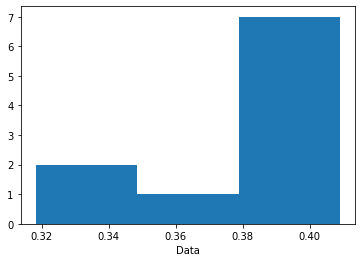

In [24]:
plt.hist(scores, bins = 3) 
plt.xlabel('Data');

In [30]:
##Trying to improve the model more. Creating an ID for each author and adding it to the prediction
# Code for creating ID's: https://stackoverflow.com/questions/45685254/q-pandas-how-to-efficiently-assign-unique-id-to-individuals-with-multiple-ent

books['id'] = books.groupby(['Author']).ngroup()
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,id
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,0,114
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,1,219
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,0,134
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,1,95
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,0,174


In [42]:
train_set, test_set = train_test_split(books, test_size = .2, random_state = 15)

X = pd.DataFrame(train_set[['User Rating', 'Reviews', 'Year','Genre', 'id']])
X2 = pd.DataFrame(test_set[['User Rating', 'Reviews', 'Year','Genre', 'id']])

rfClf = RandomForestClassifier(n_estimators=500, random_state=10)  
svmClf = SVC(probability=True, random_state=10) 
logClf = LogisticRegression(random_state=10)

voting = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

voting.fit(X, y) 

prediction5 = voting.predict(X2)
accuracy5 = voting.score(X2, y2)
print("Accuracy of Voting Classifier: %.2f%%" % (accuracy4 * 100.0))

lin_mse = mean_squared_error(y2, prediction5)
lin_rmse = np.sqrt(lin_mse)
rounded = lin_rmse.round(3)
print("Squared mean error: " + str(rounded))

Accuracy of Voting Classifier: 50.91%
Squared mean error: 4.993


In [36]:
prediction5

array([12,  4,  8, 16, 13,  8, 14,  6, 16,  9,  5,  9, 10, 16,  4,  4,  4,
        8,  6, 20, 14, 12,  8,  8, 15, 15, 13, 13, 15, 14,  8,  1, 16, 10,
        8,  4, 46, 20,  9,  9,  8,  6,  8,  4, 40,  9, 13, 15, 19, 11,  6,
        6, 13,  4,  6,  6, 12,  6, 28, 12, 10, 20,  5,  9,  6,  9,  4, 30,
       13, 14, 14, 23,  8,  8,  4, 11, 12,  8,  8, 10,  5,  4,  2, 15,  6,
        7, 12,  7, 10, 11,  9,  8, 46,  5,  8, 46, 11,  6, 14, 21,  5, 11,
        8,  8,  9,  7, 12, 11, 28, 17], dtype=int64)

In [38]:
##Trying the same strategy with book and creating an ID for them

books['book_id'] = books.groupby(['Name']).ngroup()
books.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre,id,book_id
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,0,114,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,1,219,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,0,134,2


In [43]:
train_set, test_set = train_test_split(books, test_size = .2, random_state = 15)

X = pd.DataFrame(train_set[['User Rating', 'Reviews', 'Year','Genre', 'id', 'book_id']])
X2 = pd.DataFrame(test_set[['User Rating', 'Reviews', 'Year','Genre', 'id', 'book_id']])

rfClf = RandomForestClassifier(n_estimators=500, random_state=10)  
svmClf = SVC(probability=True, random_state=10) 
logClf = LogisticRegression(random_state=10)

voting = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

voting.fit(X, y) 

prediction6 = voting.predict(X2)
accuracy6 = voting.score(X2, y2)
print("Accuracy of Voting Classifier: %.2f%%" % (accuracy6 * 100.0))

lin_mse = mean_squared_error(y2, prediction6)
lin_rmse = np.sqrt(lin_mse)
rounded = lin_rmse.round(3)
print("Squared mean error: " + str(rounded))

Accuracy of Voting Classifier: 53.64%
Squared mean error: 4.727


In [40]:
prediction6

array([ 6,  4,  8, 16,  9,  8, 14,  4,  9,  9,  5, 15, 10, 12,  4,  4,  4,
        8,  6, 20, 12,  8,  8,  8, 15, 15, 13, 13,  6, 11,  8,  1, 16, 10,
        8,  4, 46, 20,  9,  9,  5,  6,  8, 10, 40,  9,  7, 15, 19, 11,  6,
        6, 13,  4,  9,  9,  7,  6, 28, 12, 19, 20,  9,  9,  6,  9,  4, 30,
       13,  5, 14, 23,  8,  8,  4,  8, 12,  8,  8, 10, 15,  4,  2,  8,  6,
        5, 12,  7, 10, 14,  9,  8, 46,  5,  8, 46, 11,  6, 14, 21, 10, 11,
        8,  8,  5,  5, 11, 11, 28, 17], dtype=int64)